## Kaggle Competition for House Prices: Advanced Regression Techniques 

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

<AxesSubplot:>

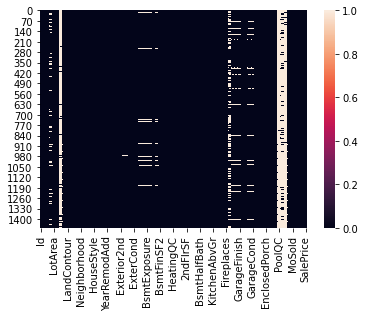

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.shape

(1460, 81)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
## Fill Missing Values

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [9]:
df.drop(['Alley'],axis=1,inplace=True)

In [10]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [11]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [12]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [13]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [14]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [15]:
df.shape

(1460, 76)

In [16]:
df.drop(['Id'],axis=1,inplace=True)

In [17]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [18]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

<AxesSubplot:>

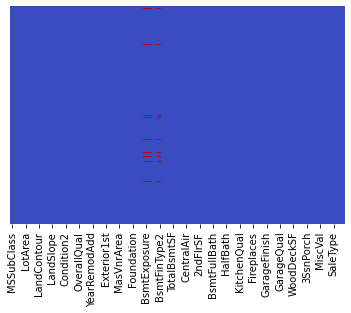

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [20]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

<AxesSubplot:>

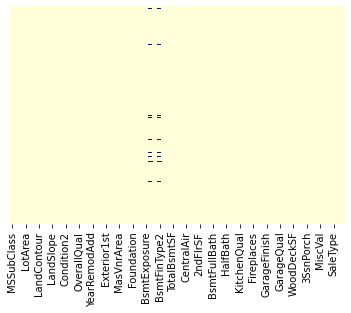

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [22]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [23]:
df.dropna(inplace=True)

In [25]:
df.shape

(1422, 75)

In [26]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [27]:
##HAndle Categorical Features

In [27]:
df.shape

(1422, 75)

In [29]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [30]:
len(columns)

39

In [30]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [310]:
main_df=df.copy()

In [311]:
## Combine Test Data 

test_df=pd.read_csv('formulatedtest.csv')

In [312]:
test_df.shape

(1459, 74)

In [313]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [314]:
final_df=pd.concat([df,test_df],axis=0)

C:\Users\krish.naik\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [316]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
30       40000.0
          ...   
1429         NaN
1430         NaN
1431         NaN
1432         NaN
1433         NaN
1434         NaN
1435         NaN
1436         NaN
1437         NaN
1438         NaN
1439         NaN
1440         NaN
1441         NaN
1442         NaN
1443         NaN
1444         NaN
1445         NaN
1446         NaN
1447         NaN
1448         NaN
1449         NaN
1450         NaN
1451         NaN
1452         NaN
1453         NaN
1454         NaN
1455         NaN
1456         N

In [317]:
final_df.shape

(2881, 75)

In [318]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [319]:
final_df.shape

(2881, 235)

In [320]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [321]:
final_df.shape

(2881, 175)

In [256]:
final_df

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,1,1,0,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,1,1,0,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,1,1,0,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,1,0,0,0,0,1,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,1,1,0,0,0,0,1,0
5,796,566,320,1,732.0,0.0,1.0,0.0,64.0,0,...,0,0,1,1,0,0,0,0,0,0
6,1694,0,0,3,1369.0,0.0,1.0,0.0,317.0,0,...,0,0,1,1,0,0,0,0,1,0
7,1107,983,0,3,859.0,32.0,1.0,0.0,216.0,228,...,0,0,1,1,0,0,0,0,1,0
8,1022,752,0,2,0.0,0.0,0.0,0.0,952.0,205,...,1,0,0,0,0,0,0,1,0,0
9,1077,0,0,2,851.0,0.0,1.0,0.0,140.0,0,...,0,0,1,1,0,0,0,0,1,0


In [322]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [324]:
df_Train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,1,1,0,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,1,1,0,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,1,1,0,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,1,0,0,0,0,1,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,1,1,0,0,0,0,1,0


In [325]:
df_Test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,0,1,1,0,0,0,0,0,0
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,0,1,1,0,0,0,0,0,0
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,0,1,1,0,0,0,0,0,0
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,0,1,1,0,0,0,0,0,0
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,0,1,1,0,0,0,0,1,0


In [327]:
df_Train.shape

(1422, 175)

In [326]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [328]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']


## Prediciton and selecting the Algorithm

In [329]:
import xgboost
classifier=xgboost.XGBRegressor()

In [147]:
import xgboost
regressor=xgboost.XGBRegressor()

In [260]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [261]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [262]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [263]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   17.4s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  5.3min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  7.9min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=50, n_jobs=4,
          param_distributions={'n_estimators': [100, 500, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15], 'learning_rate': [0.05, 0.1, 0.15, 0.2], 'min_child_weight': [1, 2, 3, 4], 'booster': ['gbtree', 'gblinear'], 'base_score': [0.25, 0.5, 0.75, 1]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=5)

In [264]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [99]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [353]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [354]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [224]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [280]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\krish.naik\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [282]:
df_Test.shape

(1459, 174)

In [347]:
df_Test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P,SalePrice
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,1,1,0,0,0,0,0,0,121033.398438
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,1,1,0,0,0,0,0,0,155717.390625
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,1,1,0,0,0,0,0,0,185616.859375
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,1,1,0,0,0,0,0,0,189161.546875
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,1,1,0,0,0,0,1,0,175323.750000


In [349]:
df_Test.drop(['SalePrice'],axis=1).head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,0,1,1,0,0,0,0,0,0
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,0,1,1,0,0,0,0,0,0
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,0,1,1,0,0,0,0,0,0
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,0,1,1,0,0,0,0,0,0
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,0,1,1,0,0,0,0,1,0


In [355]:
y_pred=regressor.predict(df_Test.drop(['SalePrice'],axis=1))

In [356]:
y_pred

array([119179.125, 158328.88 , 183704.81 , ..., 165757.22 , 118693.11 ,
       230294.19 ], dtype=float32)

In [391]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(ann_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

## Step2

In [335]:
pred.columns=['SalePrice']

In [336]:
temp_df=df_Train['SalePrice'].copy()

In [337]:
temp_df.column=['SalePrice']

In [338]:
df_Train.drop(['SalePrice'],axis=1,inplace=True)

In [339]:
df_Train=pd.concat([df_Train,temp_df],axis=1)

In [253]:
df_Test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P,SalePrice
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,1,1,0,0,0,0,0,0,121033.398438
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,1,1,0,0,0,0,0,0,155717.390625
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,1,1,0,0,0,0,0,0,185616.859375
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,1,1,0,0,0,0,0,0,189161.546875
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,1,1,0,0,0,0,1,0,175323.750000


In [340]:
df_Test=pd.concat([df_Test,pred],axis=1)

(5, 175)

In [341]:
df_Train=pd.concat([df_Train,df_Test],axis=0)

In [343]:
df_Train.shape

(2881, 175)

In [345]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

## Artificial Neural Network Implementation

In [389]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 174))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1000)

C:\Users\krish.naik\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=174, units=50, kernel_initializer="he_uniform")`
  del sys.path[0]
C:\Users\krish.naik\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=25, kernel_initializer="he_uniform")`
  app.launch_new_instance()
C:\Users\krish.naik\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50, kernel_initializer="he_uniform")`
C:\Users\krish.naik\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, kernel_initializer="he_uniform")`
C:\Users\kr

Train on 2304 samples, validate on 577 samples
Epoch 1/1000
2304/2304 [==============================] - 2s 1ms/step - loss: 113530.5093 - val_loss: 56624.8765
Epoch 2/1000
2304/2304 [==============================] - 1s 447us/step - loss: 62615.1298 - val_loss: 50444.1900
Epoch 3/1000
2304/2304 [==============================] - 1s 464us/step - loss: 56279.5739 - val_loss: 44504.8296
Epoch 4/1000
2304/2304 [==============================] - 1s 455us/step - loss: 50261.0310 - val_loss: 39335.5723
Epoch 5/1000
2304/2304 [==============================] - 1s 440us/step - loss: 44449.5163 - val_loss: 35396.5539
Epoch 6/1000
2304/2304 [==============================] - 1s 461us/step - loss: 40090.4315 - val_loss: 35178.2237
Epoch 7/1000
2304/2304 [==============================] - 1s 461us/step - loss: 37493.4126 - val_loss: 31983.3301
Epoch 8/1000
2304/2304 [==============================] - 1s 433us/step - loss: 36462.1401 - val_loss: 34241.1639
Epoch 9/1000
2304/2304 [==================

Epoch 72/1000
2304/2304 [==============================] - 1s 471us/step - loss: 29209.5491 - val_loss: 27173.5760
Epoch 73/1000
2304/2304 [==============================] - 1s 457us/step - loss: 29919.4843 - val_loss: 27220.3691
Epoch 74/1000
2304/2304 [==============================] - 1s 450us/step - loss: 29509.6134 - val_loss: 27340.0882
Epoch 75/1000
2304/2304 [==============================] - 1s 434us/step - loss: 29708.4845 - val_loss: 27312.6990
Epoch 76/1000
2304/2304 [==============================] - 1s 473us/step - loss: 29519.9725 - val_loss: 27508.6494
Epoch 77/1000
2304/2304 [==============================] - 1s 471us/step - loss: 29357.4566 - val_loss: 26867.6287
Epoch 78/1000
2304/2304 [==============================] - 1s 461us/step - loss: 29159.6736 - val_loss: 26893.8640
Epoch 79/1000
2304/2304 [==============================] - 1s 452us/step - loss: 29366.9112 - val_loss: 26603.1912
Epoch 80/1000
2304/2304 [==============================] - 1s 451us/step - loss:

Epoch 213/1000
2304/2304 [==============================] - 1s 449us/step - loss: 22039.3132 - val_loss: 18907.8804
Epoch 214/1000
2304/2304 [==============================] - 1s 448us/step - loss: 21535.5008 - val_loss: 16334.5270
Epoch 215/1000
2304/2304 [==============================] - 1s 474us/step - loss: 21397.5464 - val_loss: 15527.8804
Epoch 216/1000
2304/2304 [==============================] - 1s 459us/step - loss: 20970.6127 - val_loss: 15893.2644
Epoch 217/1000
2304/2304 [==============================] - 1s 454us/step - loss: 21382.1890 - val_loss: 16356.3695
Epoch 218/1000
2304/2304 [==============================] - 1s 451us/step - loss: 21161.6115 - val_loss: 17358.3467
Epoch 219/1000
2304/2304 [==============================] - 1s 437us/step - loss: 21313.9134 - val_loss: 16149.4819
Epoch 220/1000
2304/2304 [==============================] - 1s 451us/step - loss: 21500.9419 - val_loss: 15796.3191
Epoch 221/1000
2304/2304 [==============================] - 1s 443us/ste

Epoch 354/1000
2304/2304 [==============================] - 1s 441us/step - loss: 17982.2255 - val_loss: 15111.4960
Epoch 355/1000
2304/2304 [==============================] - 1s 441us/step - loss: 18200.9428 - val_loss: 16779.2044
Epoch 356/1000
2304/2304 [==============================] - 1s 437us/step - loss: 17829.2466 - val_loss: 15074.7010
Epoch 357/1000
2304/2304 [==============================] - 1s 448us/step - loss: 18016.9196 - val_loss: 14864.5632
Epoch 358/1000
2304/2304 [==============================] - 1s 430us/step - loss: 17915.1799 - val_loss: 24316.4935
Epoch 359/1000
2304/2304 [==============================] - 1s 439us/step - loss: 19223.4313 - val_loss: 14180.9230
Epoch 360/1000
2304/2304 [==============================] - 1s 426us/step - loss: 18647.8201 - val_loss: 13863.6924
Epoch 361/1000
2304/2304 [==============================] - 1s 436us/step - loss: 18664.2566 - val_loss: 15385.2874
Epoch 362/1000
2304/2304 [==============================] - 1s 444us/ste

2304/2304 [==============================] - 1s 443us/step - loss: 16618.5890 - val_loss: 13543.7893
Epoch 495/1000
2304/2304 [==============================] - 1s 437us/step - loss: 17146.2448 - val_loss: 18693.5495
Epoch 496/1000
2304/2304 [==============================] - 1s 442us/step - loss: 16916.5060 - val_loss: 13491.6188
Epoch 497/1000
2304/2304 [==============================] - 1s 440us/step - loss: 16322.7569 - val_loss: 14055.7516
Epoch 498/1000
2304/2304 [==============================] - 1s 443us/step - loss: 16738.7356 - val_loss: 13729.1235
Epoch 499/1000
2304/2304 [==============================] - 1s 446us/step - loss: 17037.1458 - val_loss: 19032.3017
Epoch 500/1000
2304/2304 [==============================] - 1s 443us/step - loss: 17037.1399 - val_loss: 13309.6670
Epoch 501/1000
2304/2304 [==============================] - 1s 453us/step - loss: 16405.3647 - val_loss: 13464.1638
Epoch 502/1000
2304/2304 [==============================] - 1s 449us/step - loss: 17211

Epoch 565/1000
2304/2304 [==============================] - 1s 443us/step - loss: 15908.4225 - val_loss: 15984.1726
Epoch 566/1000
2304/2304 [==============================] - 1s 446us/step - loss: 16004.9399 - val_loss: 13905.7834
Epoch 567/1000
2304/2304 [==============================] - 1s 446us/step - loss: 16389.2974 - val_loss: 13452.7645
Epoch 568/1000
2304/2304 [==============================] - 1s 436us/step - loss: 15584.9971 - val_loss: 14775.5267
Epoch 569/1000
2304/2304 [==============================] - 1s 437us/step - loss: 15664.2811 - val_loss: 13648.0294
Epoch 570/1000
2304/2304 [==============================] - 1s 434us/step - loss: 16375.2549 - val_loss: 13240.0203
Epoch 571/1000
2304/2304 [==============================] - 1s 441us/step - loss: 15903.5278 - val_loss: 14575.3229
Epoch 572/1000
2304/2304 [==============================] - 1s 445us/step - loss: 16540.2915 - val_loss: 12986.2193
Epoch 573/1000
2304/2304 [==============================] - 1s 439us/ste

Epoch 635/1000
2304/2304 [==============================] - 1s 442us/step - loss: 15981.6069 - val_loss: 14574.5966
Epoch 636/1000
2304/2304 [==============================] - 1s 438us/step - loss: 15255.1359 - val_loss: 16051.3238
Epoch 637/1000
2304/2304 [==============================] - 1s 445us/step - loss: 15448.6940 - val_loss: 13010.1859
Epoch 638/1000
2304/2304 [==============================] - 1s 451us/step - loss: 15537.2544 - val_loss: 14263.5028
Epoch 639/1000
2304/2304 [==============================] - 1s 435us/step - loss: 15717.0864 - val_loss: 13682.7131
Epoch 640/1000
2304/2304 [==============================] - 1s 445us/step - loss: 15358.8598 - val_loss: 13410.3975
Epoch 641/1000
2304/2304 [==============================] - 1s 442us/step - loss: 15642.4729 - val_loss: 13778.9329
Epoch 642/1000
2304/2304 [==============================] - 1s 445us/step - loss: 16350.4903 - val_loss: 21586.3186
Epoch 643/1000
2304/2304 [==============================] - 1s 441us/ste

2304/2304 [==============================] - 1s 420us/step - loss: 14974.0176 - val_loss: 15539.5823
Epoch 776/1000
2304/2304 [==============================] - 1s 440us/step - loss: 15169.9119 - val_loss: 13228.7943
Epoch 777/1000
2304/2304 [==============================] - 1s 442us/step - loss: 14630.1758 - val_loss: 13663.6288
Epoch 778/1000
2304/2304 [==============================] - 1s 456us/step - loss: 14674.2638 - val_loss: 12558.5938
Epoch 779/1000
2304/2304 [==============================] - 1s 445us/step - loss: 14920.9787 - val_loss: 13532.3238
Epoch 780/1000
2304/2304 [==============================] - 1s 430us/step - loss: 15182.5596 - val_loss: 15951.0021
Epoch 781/1000
2304/2304 [==============================] - 1s 424us/step - loss: 14665.4194 - val_loss: 12908.2029
Epoch 782/1000
2304/2304 [==============================] - 1s 426us/step - loss: 14690.0533 - val_loss: 14167.9302
Epoch 783/1000
2304/2304 [==============================] - 1s 420us/step - loss: 14653

Epoch 846/1000
2304/2304 [==============================] - 1s 437us/step - loss: 14060.4311 - val_loss: 13225.5006
Epoch 847/1000
2304/2304 [==============================] - 1s 429us/step - loss: 14654.3758 - val_loss: 13023.3650
Epoch 848/1000
2304/2304 [==============================] - 1s 420us/step - loss: 14654.8375 - val_loss: 13103.5657
Epoch 849/1000
2304/2304 [==============================] - 1s 431us/step - loss: 14830.6239 - val_loss: 13058.2414
Epoch 850/1000
2304/2304 [==============================] - 1s 413us/step - loss: 14764.2105 - val_loss: 13815.4281
Epoch 851/1000
2304/2304 [==============================] - 1s 419us/step - loss: 14613.9552 - val_loss: 13237.9735
Epoch 852/1000
2304/2304 [==============================] - 1s 418us/step - loss: 14611.7756 - val_loss: 13520.5362
Epoch 853/1000
2304/2304 [==============================] - 1s 422us/step - loss: 14431.8364 - val_loss: 13894.3668
Epoch 854/1000
2304/2304 [==============================] - 1s 427us/ste

2304/2304 [==============================] - 1s 387us/step - loss: 13951.3668 - val_loss: 12503.4262
Epoch 987/1000
2304/2304 [==============================] - 1s 374us/step - loss: 13732.6873 - val_loss: 12674.2793
Epoch 988/1000
2304/2304 [==============================] - 1s 384us/step - loss: 14143.0375 - val_loss: 12801.1951
Epoch 989/1000
2304/2304 [==============================] - 1s 376us/step - loss: 14586.6882 - val_loss: 13891.1528
Epoch 990/1000
2304/2304 [==============================] - 1s 376us/step - loss: 14043.9540 - val_loss: 12848.9969
Epoch 991/1000
2304/2304 [==============================] - 1s 383us/step - loss: 14709.4745 - val_loss: 13196.8980
Epoch 992/1000
2304/2304 [==============================] - 1s 379us/step - loss: 13989.1206 - val_loss: 13358.9111
Epoch 993/1000
2304/2304 [==============================] - 1s 373us/step - loss: 13895.6108 - val_loss: 12177.6148
Epoch 994/1000
2304/2304 [==============================] - 1s 377us/step - loss: 13983

In [390]:
ann_pred=classifier.predict(df_Test.drop(['SalePrice'],axis=1).values)

In [382]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))